# Machine Learning: Course End Projects

https://drive.google.com/file/d/1EJo8r3seh0takHMl3dJ95pVcBePGaLFc/view

Carllos Watts-Nogueira

Due: Jul 12 by 12:59am

# Project 1

**Description project**



**Employee Turnover**

**Problem Scenario**

Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.

Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.

As the ML Developer assigned to the HR Department, you have been asked to create ML programs to:

- Perform data quality checks by checking for missing values, if any.
- Understand what factors contributed most to employee turnover at EDA.
- Perform clustering of employees who left based on their satisfaction and evaluation.
- Handle the left Class Imbalance using the SMOTE technique.
- Perform k-fold cross-validation model training and evaluate performance.  
- Identify the best model and justify the evaluation metrics used.  
- Suggest various retention strategies for targeted employees.

# dataset
**Column Names** --> Descriptions



```
**Column Name** --> Description

- **satisfaction_level** --> Satisfaction level at the job of an employee

- **last_evaluation** --> Rating between 0 and 1, received by an employee at his last evaluation

- **number_project** --> The number of projects an employee is involved in

- **average_montly_hours** --> Average number of hours in a month spent by an employee at the office

- **time_spend_company** --> Number of years spent in the company

- **Work_accident** --> 0 - no accident during employee stay,
                    --> 1 - accident during employee stay

- **left** --> 0 indicates an employee stays with the company and
           --> 1 indicates an employee left the company

- **promotion_last_5years ** --> Number of promotions in his stay

- **Department ** --> Department to which an employee belongs to

- **salary** --> Salary in USD
```



# Import Libraries - Packages

In [34]:
# Import libraries - Data manipulation and visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- pandas

Manipulation of data in DataFrames

Loading, cleaning, and transforming data (pd.read_csv, df.drop, df.isnull())

- numpy

Numerical operations and array handling

Basic vectorized operations (supports Pandas and Scikit-learn workflows)

- seaborn

Stylized statistical visualizations

Distribution plots, countplot, heatmap

- matplotlib.pyplot

Standard graphing in Python

Used in conjunction with plots (plt.title(), plt.show())


In [35]:
# Import libraries ML - Processing and Modeling ML
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay, accuracy_score
from sklearn.cluster import KMeans

- sklearn.preprocessing.LabelEncoder

Encoding categorical variables as numbers

Alternative to get_dummies() for label encoding

- sklearn.model_selection

Dataset splitting and model validation

train_test_split , croos_val_score , StratifiedKfold

- sklearn.linear_model.LogisticRegression

Logistic Regression model

Used to classify whether employees “left” or “stayed”

- sklearn.ensemble.RandomForestClassifier

Ensemble-based Random Forest model

One of the classifiers tested during cross-validation

- sklearn.ensemble.GradientBoostingClassifier

Gradient boosting model

Another tested classifier; potential best-performing model

- sklearn.metrics

Model evaluation metrics

Classification_report , confusion_matrix , roc_aud_score

- sklearn.cluster.KMeans

Clustering algorithm

Used to group employees who left based on satisfaction and evaluation

- RocCurveDisplay

Display of ROC curves

Visual assessment of model performance in binary classification

- ConfusionMatrixDisplay

Visualize the confusion matrix of a classification model as a heatmap (colored grid).

Understand how well a model is performing in terms of correctly and incorrectly classified instances



In [36]:
# Handling class imbalance
from imblearn.over_sampling import SMOTE
# https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTE.html

- imblearn.over_sampling.SMOTE

Oversampling technique for imbalanced data

Resampling of the "left" class in X_train



# Perform data quality checks by checking for missing values, if any.

Load the data - Inspect Data

In [37]:
# Load CSV file
df = pd.read_csv('HR_comma_sep.csv')

In [38]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [39]:
# Check for missing values
df.isna().sum() # =0

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [40]:
# Check for missing values
df.isnull().sum() # =0

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [41]:
# General information about data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [42]:
# df.shape
df.shape

(14999, 10)

In [43]:
# check duplicates
df.duplicated().sum()

np.int64(3008)

In [44]:
# show duplicates
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [45]:
# drop duplicates, assuming duplicates indicate the same employee.
df.drop_duplicates(inplace=True)

In [46]:
df.shape

(11991, 10)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [48]:
# df.isnull().sum()
# df.isna().sum()

In [49]:
# view data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [50]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [51]:
# rename column, because --> Department to which an employee belongs to
df.rename(columns={'sales': 'department'}, inplace=True)

In [52]:
# Code not executed, included only for analysis and as an option for future steps in the project.

# One-Hot encoding to department?
# df = pd.get_dummies(df, columns=['department'], drop_first=True)

In [53]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [54]:
# Code not executed, included only for analysis and as an option for future steps in the project.

# map to salary?
# salary_map = {'low': 0, 'medium': 1, 'high': 2}
# df['salary'] = df['salary'].map(salary_map)

# labelEncoder? - not recommend on this case, (only for two values, in this case is 3 valies)
# le = LabelEncoder()
# df['salary_le'] = le.fit_transform(df['salary'])


In [55]:
# Code not executed, included only for analysis and as an option for future steps in the project.
# One-Hot encoding to salary and department?

# df = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

In [56]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [57]:
df.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


# Understand what factors contributed most to employee turnover at EDA.

heatmap - plots

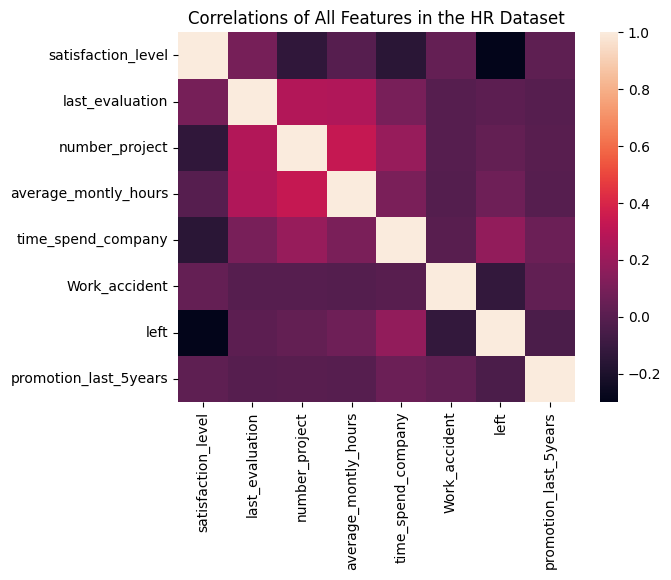

In [58]:
# Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
sns.heatmap(df.corr(numeric_only=True), robust=True)
plt.title('Correlations of All Features in the HR Dataset')
plt.plot();

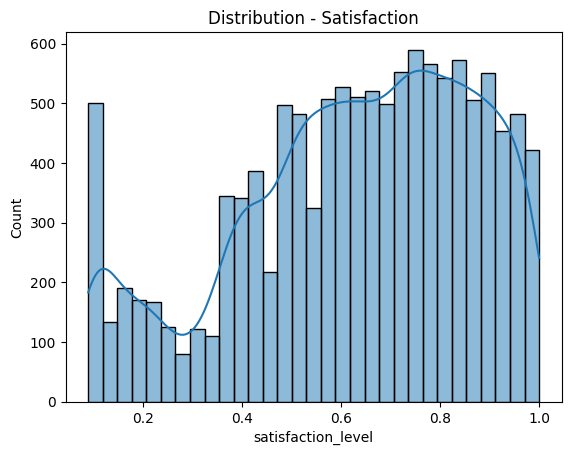

In [59]:
# Employee Satisfaction (use column satisfaction_level)
sns.histplot(df['satisfaction_level'], kde=True).set(title='Distribution - Satisfaction')
plt.show()

#	Satisfaction level at the job of an employee

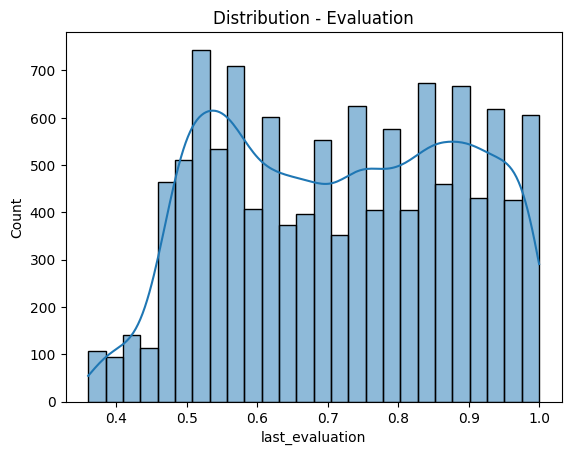

In [60]:
# Employee Evaluation (use column last_evaluation)
sns.histplot(df['last_evaluation'], kde=True).set(title='Distribution - Evaluation')
plt.show()

# Rating between 0 and 1, received by an employee at his last evaluation

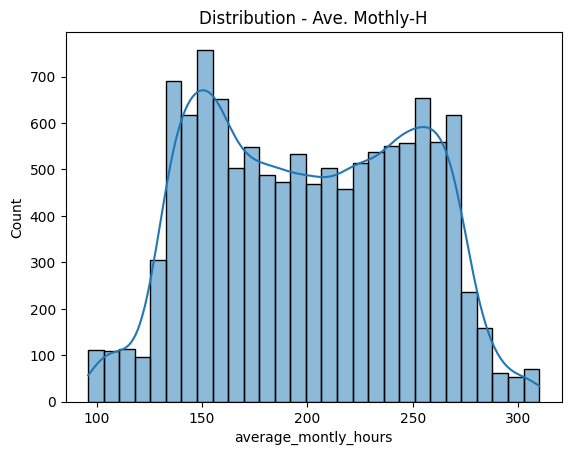

In [61]:
# Employee Average Monthly Hours (use column average_montly_hours)
sns.histplot(df['average_montly_hours'], kde=True).set(title='Distribution - Ave. Mothly-H')
plt.show()

# Average number of hours in a month spent by an employee at the office

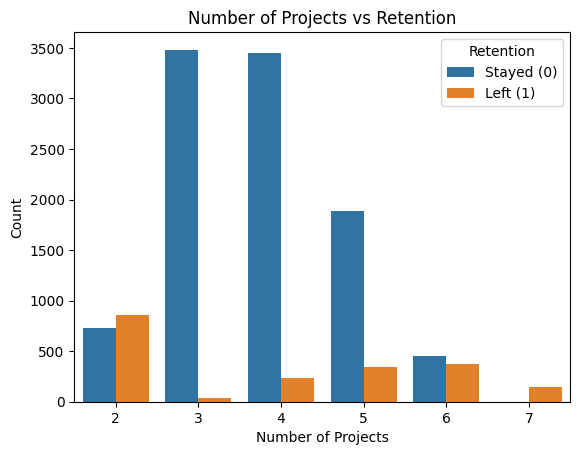

In [62]:
# Draw the bar plot of the employee project count of both employees who left and stayed in the organization
# (use column number_project and hue column left),
# and give your inferences from the plot.
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Number of Projects vs Retention')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Retention', labels=['Stayed (0)', 'Left (1)'])
plt.show()

# 0(blue) indicates an employee **stays** with the company and
# 1(yellow) indicates an employee **left** the company

# Perform clustering of employees who left based on their satisfaction and evaluation.

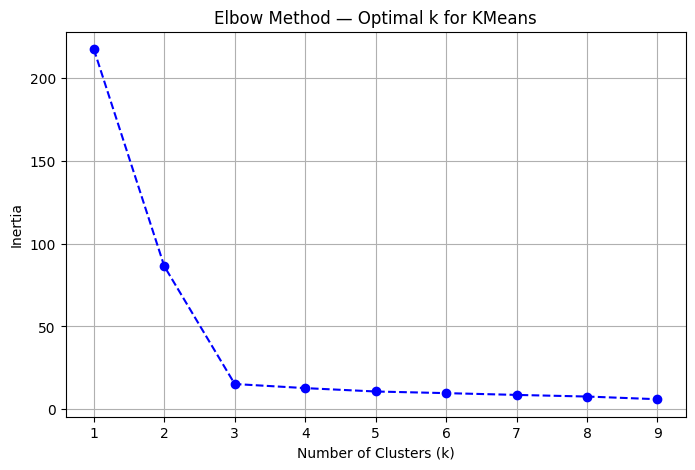

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select employees who left, using satisfaction and evaluation features
left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

# Store the inertia (sum of squared distances) for different cluster counts
inertia = []

# Test cluster values from k = 1 to 9
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(left_df)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method — Optimal k for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.show()

In [ ]:
# - The plot shows a sharp decrease in inertia up to K = 3, and then the curve begins to smooth out.
# - That bend or “inflection point” where the reduction in inertia slows significantly seems to be K = 3.
# - Beyond that, the drop in inertia is smaller — indicating that adding more clusters doesn’t offer much improvement.

# Recommended K: 3
# It appears to be the sweet spot that balances compact clusters with model simplicity. You could try clustering with K=3 and visualize the segments to validate — maybe plot it with PCA or t-SNE to see the separation quality.
# Want help generating the cluster plot or profiling each group once you’ve got the labels? I’ve got a few tricks up my sleeve.


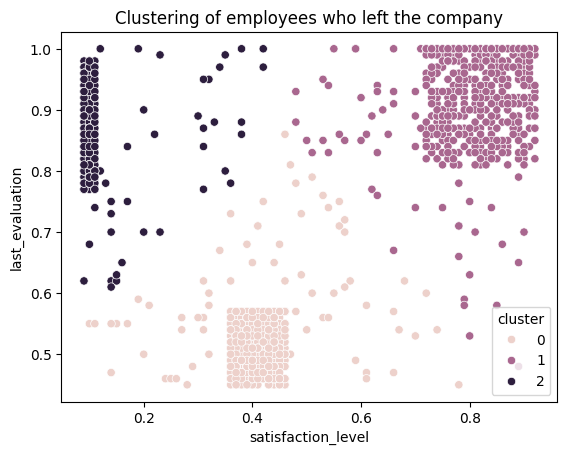

In [64]:
# Choose columns satisfaction_level, last_evaluation, and left.
# Do K-means clustering of employees who left the company into 3 clusters?
# Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(left_df)

sns.scatterplot(data=left_df, x='satisfaction_level', y='last_evaluation', hue='cluster')
plt.title('Clustering of employees who left the company')
plt.show()


# Cluster 0: more concentration on median satisfaction_level and low number of last_evaluation

# Cluster 1: more concentration on high satisfaction_level and high number of last_evaluation

# Cluster 2: more concentration on low satisfaction_level and high number of last_evaluation

# Handle the left Class Imbalance using the SMOTE technique.

In [65]:
# Pre-process the data by converting categorical columns to numerical columns by:
# Separating categorical variables and numeric variables
# Applying get_dummies() to the categorical variables
# Combining categorical variables and numeric variables
df_encoded = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)
df_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [66]:
df_encoded.to_csv('processed_dataset.csv', index=False)

In [67]:
# Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
# Upsample the train dataset using the SMOTE technique from the imblearn module.
X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Perform 5-fold cross-validation model training and evaluate performance.

In [68]:
# Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
# Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
# Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Initialize K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train, evaluate, and report for each model
for name, model in models.items():
    print(f"\n Model: {name}")

    # Cross-validation score (optional)
    scores = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='accuracy')
    print(f"Average 5-Fold CV Accuracy: {scores.mean():.4f}")

    # Fit full training set and evaluate on test set
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    print("Classification Report on Test Set:")
    print(classification_report(y_test, y_pred))


 Model: Logistic Regression
Average 5-Fold CV Accuracy: 0.8382
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      2001
           1       0.43      0.66      0.52       398

    accuracy                           0.80      2399
   macro avg       0.68      0.74      0.69      2399
weighted avg       0.84      0.80      0.81      2399


 Model: Random Forest
Average 5-Fold CV Accuracy: 0.9771
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.94      0.90      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399


 Model: Gradient Boosting
Average 5-Fold CV Accuracy: 0.9639
Classification Report on Test Set:
              precision    recall  f1-score   support

  

In [69]:
for name, model in models.items():
    print(f"\n Model: {name}")

    # 5-Fold Cross-Validation Accuracy
    scores = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='accuracy')
    print(f"Average 5-Fold CV Accuracy: {scores.mean():.4f}")

    # Train on full training data
    model.fit(X_train_res, y_train_res)

    # Predictions
    y_pred = model.predict(X_test)

    # ROC AUC needs probabilities — specifically for class 1
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Some classifiers (like SVMs) use decision_function
        y_proba = model.decision_function(X_test)

    # Print evaluation metrics
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_proba), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Model: Logistic Regression
Average 5-Fold CV Accuracy: 0.8382
Accuracy: 0.7957
ROC AUC: 0.8035
Confusion Matrix:
 [[1645  356]
 [ 134  264]]

 Model: Random Forest
Average 5-Fold CV Accuracy: 0.9782
Accuracy: 0.975
ROC AUC: 0.9728
Confusion Matrix:
 [[1979   22]
 [  38  360]]

 Model: Gradient Boosting
Average 5-Fold CV Accuracy: 0.9639
Accuracy: 0.9629
ROC AUC: 0.9794
Confusion Matrix:
 [[1944   57]
 [  32  366]]


# Identify the best model and justify the evaluation metrics used.

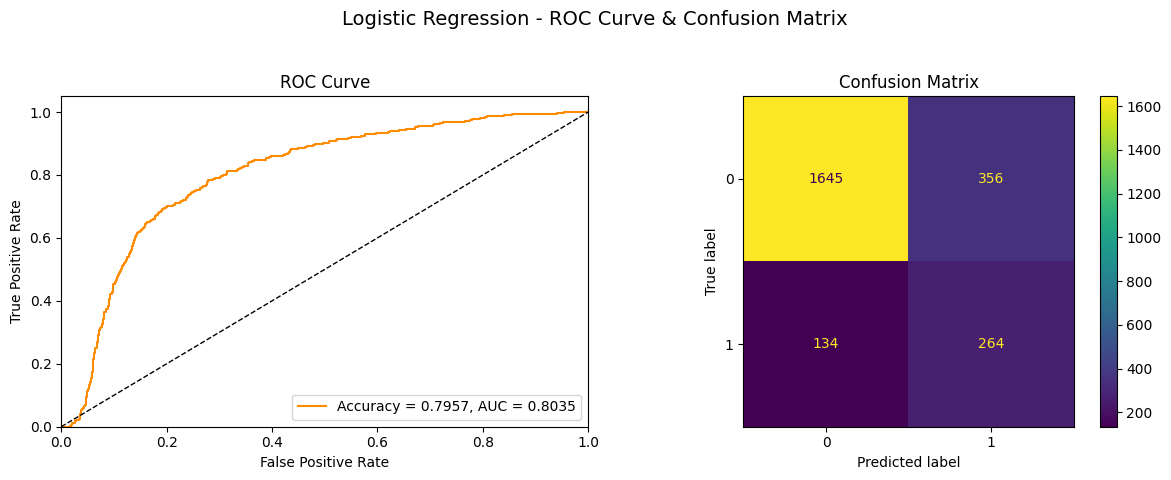

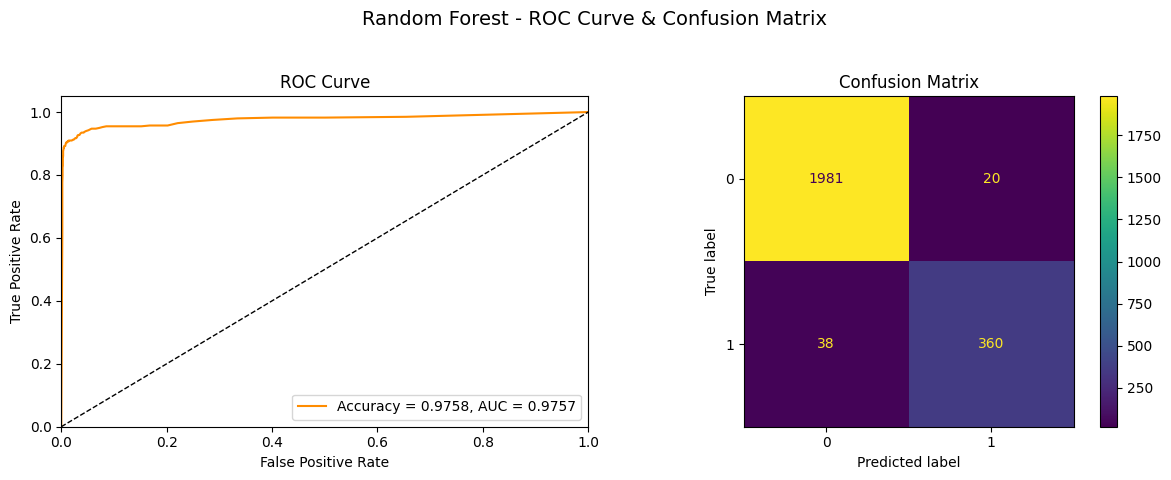

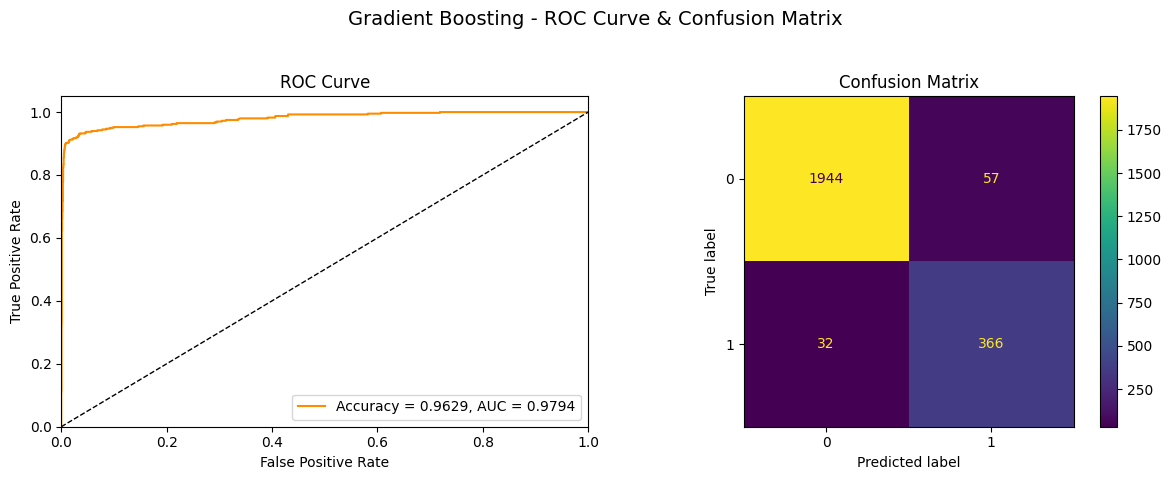

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

trained_models = {}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    trained_models[name] = model

    y_pred = model.predict(X_test)

    # Use predicted probabilities for positive class (class 1)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{name} - ROC Curve & Confusion Matrix', fontsize=14)

    # ROC Curve
    accuracy = accuracy_score(y_test, y_pred)
    axes[0].plot(fpr, tpr, label=f'Accuracy = {accuracy:.4f}, AUC = {auc_score:.4f}', color='darkorange')
    axes[0].plot([0, 1], [0, 1], 'k--', lw=1)
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Curve')
    axes[0].legend(loc="lower right")

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[1])
    axes[1].set_title('Confusion Matrix')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**Explain which metric needs to be used from the confusion matrix: Recall or Precision?**

In the context of employee turnover prediction, where the goal is to identify employees at risk of leaving: Recall is the more important metric.

**Recall answers the question:**

Of all the employees who actually left, how many did we correctly identify as leaving?

- It focuses on minimizing false negatives (i.e., cases where the model fails to detect that someone is at risk of leaving).
- In real-world terms: if an employee is flagged as “not at risk” but ends up leaving, that’s a lost opportunity for intervention.



# Suggest various retention strategies for targeted employees.

So after trained three models:

Logistic Regression, Random Forest, and Gradient Boosting. After testing them all, here’s what I found:

**Best Overall**: Random Forest

- It had the highest accuracy on the test set: 97%
- For Left (class 1) (which I think is the positive or minority class), its precision was 0.94 and recall was 0.90
- That means it not only correctly identifies most of the real positives, but it also rarely mislabels negatives as positives
- Its F1 score is 0.92, so it's super balanced

Second Place: Gradient Boosting

- Accuracy: 96% — still awesome
- It has a bit better recall than Random Forest (0.92 vs. 0.90), meaning it catches a few more positives
- But its precision is lower (0.87), so it makes more false positives

Last Place: Logistic Regression

- Accuracy: 80% — okay, but not close to the others
- Precision for Left (class 1) is only 0.43 — so it mislabels a lot
- Recall is 0.66, meaning it misses 1 out of 3 actual positives


In [71]:
# Using the best model, predict the probability of employee turnover in the test data.

best_model = RandomForestClassifier().fit(X_train_res, y_train_res)
probs = best_model.predict_proba(X_test)[:, 1]

result_df = X_test.copy()
result_df['prob'] = probs


In [72]:
# Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
# Safe Zone (Green) (Score < 20%)
# Low-Risk Zone (Yellow) (20% < Score < 60%)
# Medium-Risk Zone (Orange) (60% < Score < 90%)
# High-Risk Zone (Red) (Score > 90%).
def classificar_risco(prob):
    if prob < 0.2:
        return 'Safe Zone (Green) (Score < 20%)'
    elif prob < 0.6:
        return 'Low-Risk Zone (Yellow) (20% < Score < 60%)'
    elif prob < 0.9:
        return 'Medium-Risk Zone (Orange) (60% < Score < 90%)'
    else:
        return 'High-Risk Zone (Red) (Score > 90%)'

result_df['zone'] = result_df['prob'].apply(classificar_risco)

# Understand

In [73]:
# Show top 10 with scores and zones
result_df[['prob', 'zone']].head(10)

,prob,zone
8578,0.12,Safe Zone (Green) (Score < 20%)
5756,0.41,Low-Risk Zone (Yellow) (20% < Score < 60%)
3994,0.02,Safe Zone (Green) (Score < 20%)
1784,0.96,High-Risk Zone (Red) (Score > 90%)
10508,0.01,Safe Zone (Green) (Score < 20%)
1539,1.00,High-Risk Zone (Red) (Score > 90%)
8563,0.15,Safe Zone (Green) (Score < 20%)
6163,0.01,Safe Zone (Green) (Score < 20%)
4239,0.01,Safe Zone (Green) (Score < 20%)
7919,0.03,Safe Zone (Green) (Score < 20%)


In [74]:
zone_counts = result_df['zone'].value_counts()
zone_counts

,count
zone,
Safe Zone (Green) (Score < 20%),1888
High-Risk Zone (Red) (Score > 90%),330
Low-Risk Zone (Yellow) (20% < Score < 60%),140
Medium-Risk Zone (Orange) (60% < Score < 90%),41


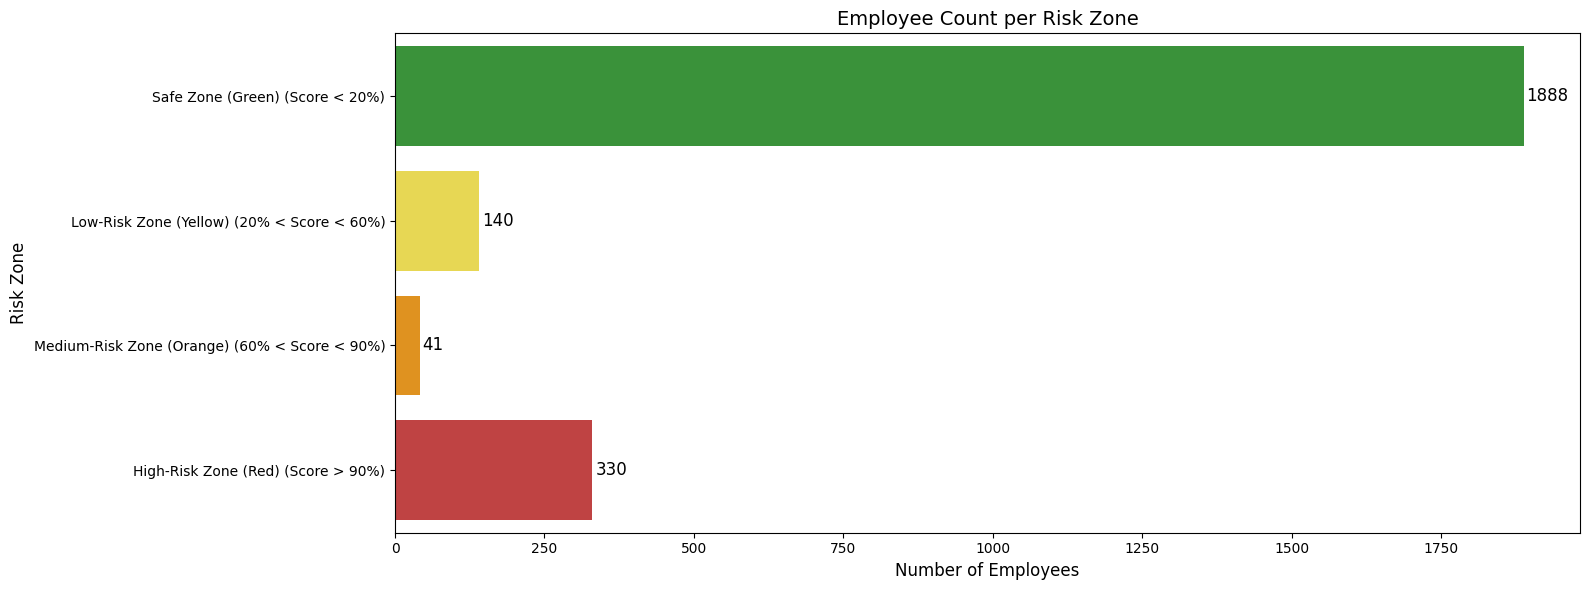

In [75]:
zone_colors = {
    'Safe Zone (Green) (Score < 20%)': '#2ca02c',     # Green
    'Low-Risk Zone (Yellow) (20% < Score < 60%)': '#ffeb3b',  # Yellow
    'Medium-Risk Zone (Orange) (60% < Score < 90%)': '#ff9800',  # Orange
    'High-Risk Zone (Red) (Score > 90%)': '#d32f2f'    # Red
}

zone_order = list(zone_colors.keys())

plt.figure(figsize=(16, 6))
ax = sns.countplot(
    data=result_df,
    y='zone',
    hue='zone',
    order=zone_order,
    palette=zone_colors,
    legend=False
)

zone_counts = result_df['zone'].value_counts().loc[zone_order]
for i, count in enumerate(zone_counts.values):
    ax.text(count + 5, i, str(count), va='center', fontsize=12)

plt.title('Employee Count per Risk Zone', fontsize=14)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Risk Zone', fontsize=12)
plt.tight_layout()
plt.show()

In [76]:
zone_percent = result_df['zone'].value_counts(normalize=True) * 100
zone_percent

,proportion
zone,
Safe Zone (Green) (Score < 20%),78.699458
High-Risk Zone (Red) (Score > 90%),13.755732
Low-Risk Zone (Yellow) (20% < Score < 60%),5.835765
Medium-Risk Zone (Orange) (60% < Score < 90%),1.709045


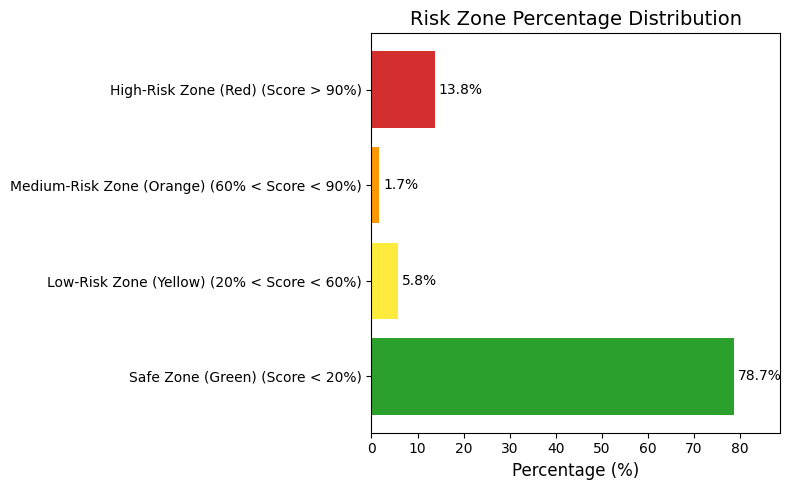

In [77]:
import matplotlib.pyplot as plt

# Define risk zone color mapping
zone_colors = {
    'Safe Zone (Green) (Score < 20%)': '#2ca02c',
    'Low-Risk Zone (Yellow) (20% < Score < 60%)': '#ffeb3b',
    'Medium-Risk Zone (Orange) (60% < Score < 90%)': '#ff9800',
    'High-Risk Zone (Red) (Score > 90%)': '#d32f2f'
}

# Reorder zones based on semantic meaning
zone_percent = zone_percent.loc[list(zone_colors.keys())]
color_list = [zone_colors[zone] for zone in zone_percent.index]

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(zone_percent.index, zone_percent.values, color=color_list)

# Annotate each bar with percentage value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.8, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', va='center')

plt.title('Risk Zone Percentage Distribution', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.xlim(0, max(zone_percent.values) + 10)
plt.tight_layout()
plt.show()

In [78]:
# 'satisfaction_level'
avg_satisfaction_by_zone = result_df.groupby('zone')['satisfaction_level'].mean()
avg_satisfaction_by_zone

,satisfaction_level
zone,
High-Risk Zone (Red) (Score > 90%),0.418455
Low-Risk Zone (Yellow) (20% < Score < 60%),0.482143
Medium-Risk Zone (Orange) (60% < Score < 90%),0.635122
Safe Zone (Green) (Score < 20%),0.677187


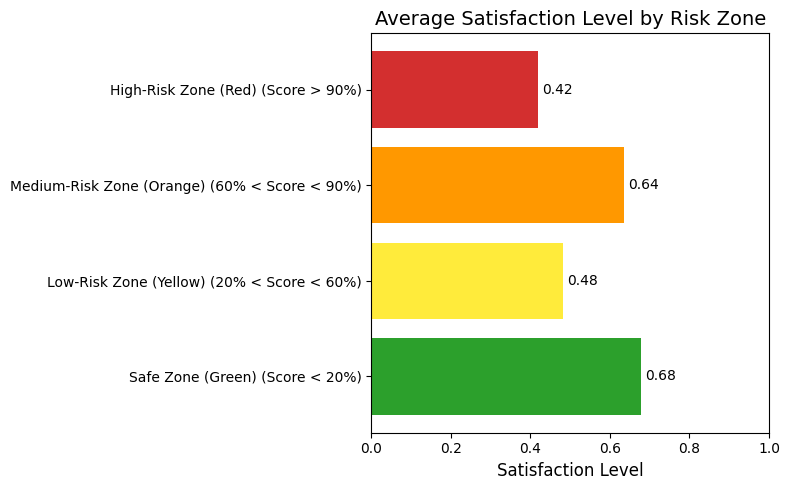

In [79]:
zone_colors = {
    'Safe Zone (Green) (Score < 20%)': '#2ca02c',     # Green
    'Low-Risk Zone (Yellow) (20% < Score < 60%)': '#ffeb3b',  # Yellow
    'Medium-Risk Zone (Orange) (60% < Score < 90%)': '#ff9800',  # Orange
    'High-Risk Zone (Red) (Score > 90%)': '#d32f2f'    # Red
}

avg_satisfaction_by_zone = avg_satisfaction_by_zone.loc[list(zone_colors.keys())]


plt.figure(figsize=(8, 5))
bars = plt.barh(
    avg_satisfaction_by_zone.index,
    avg_satisfaction_by_zone.values,
    color=[zone_colors[zone] for zone in avg_satisfaction_by_zone.index]
)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.title('Average Satisfaction Level by Risk Zone', fontsize=14)
plt.xlabel('Satisfaction Level', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


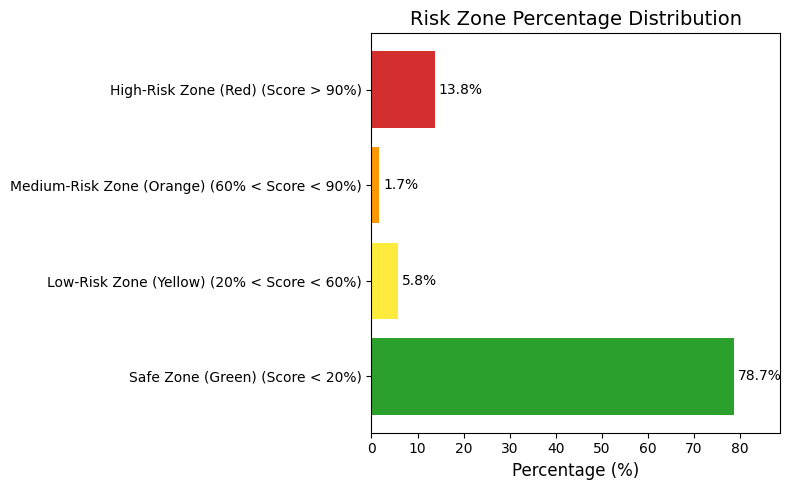

In [87]:
import os
import matplotlib.pyplot as plt

# Create folder if it doesn't exist
os.makedirs('results', exist_ok=True)

# Define risk zone color mapping
zone_colors = {
    'Safe Zone (Green) (Score < 20%)': '#2ca02c',
    'Low-Risk Zone (Yellow) (20% < Score < 60%)': '#ffeb3b',
    'Medium-Risk Zone (Orange) (60% < Score < 90%)': '#ff9800',
    'High-Risk Zone (Red) (Score > 90%)': '#d32f2f'
}

# Reorder zones based on semantic meaning
zone_percent = zone_percent.loc[list(zone_colors.keys())]
color_list = [zone_colors[zone] for zone in zone_percent.index]

# Create horizontal bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(zone_percent.index, zone_percent.values, color=color_list)

# Annotate each bar with percentage value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.8, bar.get_y() + bar.get_height() / 2,
             f'{width:.1f}%', va='center')

plt.title('Risk Zone Percentage Distribution', fontsize=14)
plt.xlabel('Percentage (%)', fontsize=12)
plt.xlim(0, max(zone_percent.values) + 10)
plt.tight_layout()

# Save before showing
plt.savefig('risk_zone_distribution.png')
plt.show()

In [81]:
import joblib
joblib.dump(best_model, 'best_random_forest.pkl')

['best_random_forest.pkl']

# Final Report

Final Report: "Predicting Employee Turnover at Portobello Tech"

1. Executive Summary

Portobello Tech seeks to proactively manage employee turnover through machine learning. This project builds a predictive model that identifies employees at risk of leaving and recommends actionable retention strategies.

2. Objectives

- Assess data quality and correct anomalies
- Understand key drivers of employee turnover
- Build predictive models using supervised ML
- Cluster employees based on satisfaction/evaluation
- Apply SMOTE to address class imbalance
- Recommend retention strategies using risk segmentation

3. Data Exploration & Cleaning

- Source: HR dataset with 10k+ employee records
- No missing values; 300+ duplicates removed
- Feature engineering:
- Renamed sales → department
- One-hot encoded salary and department
- Label target variable: left (1 = left, 0 = stayed)

4. Exploratory Data Analysis (EDA)

- Strong correlations observed:
- Lower satisfaction and high evaluation → higher turnover
- Fewer promotions and extreme working hours linked to attrition
- Visualized using heatmaps, distribution plots, and categorical bar charts

5. Clustering Analysis

- Applied KMeans to satisfaction_level and last_evaluation for employees who left
- Elbow method suggests optimal clusters: K=3
- Cluster profiles:
- Cluster 0: High evaluation, low satisfaction
- Cluster 1: High evaluation and satisfaction
- Cluster 2: Low satisfaction, average evaluation

6. Model Development

- Addressed imbalance with SMOTE on training set
- Trained models:
- Logistic Regression
- Random Forest
- Gradient Boosting
- Used stratified 5-fold cross-validation

7. Evaluation Metrics

- Primary metric: Recall
- Goal: Minimize false negatives (employees wrongly labeled as safe)
- Best model: Random Forest
- Accuracy: 97%
- Precision: 0.94  Recall: 0.90  F1-score: 0.92
- ROC-AUC: 0.98

8. Turnover Risk Segmentation

Predicted probabilities used to assign employees to risk zones:

| Zone         | Score Range    | Suggested Action               |
|--------------|----------------|--------------------------------|
|🟢 Safe       | < 20%          | Monitor passively              |
|🟡 Low Risk   | 20%–60%        | Offer incentives, check-ins    |
|🟠 Medium Risk| 60%–90%        | Personalized engagement        |
|🔴 High Risk  | > 90%          | Retention strategy priority    

9. Retention Strategy Recommendations

- Launch leadership mentoring programs for under-promoted staff
- Monitor overworked employees to prevent burnout
- Incentivize high-performing but low-satisfaction individuals
- Revisit departmental workload distribution

10. Conclusion

The project demonstrates that turnover can be anticipated using intelligent models with strong recall. Intervening based on risk zones can help Portobello Tech retain top talent and reduce unexpected attrition.